In [77]:
import numpy
import pandas

from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

seed = 7
numpy.random.seed(seed)


In [78]:
dataframe = pandas.read_csv("forestfires.csv")
dataframe

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [79]:
dataframe.drop(columns=['X', 'Y'], inplace=True)



In [80]:
dataframe

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [81]:
print("Statistical Description:", dataframe.describe())

Statistical Description:              FFMC         DMC          DC         ISI        temp          RH  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean    90.644681  110.872340  547.940039    9.021663   18.889168   44.288201   
std      5.520111   64.046482  248.066192    4.559477    5.806625   16.317469   
min     18.700000    1.100000    7.900000    0.000000    2.200000   15.000000   
25%     90.200000   68.600000  437.700000    6.500000   15.500000   33.000000   
50%     91.600000  108.300000  664.200000    8.400000   19.300000   42.000000   
75%     92.900000  142.400000  713.900000   10.800000   22.800000   53.000000   
max     96.200000  291.300000  860.600000   56.100000   33.300000  100.000000   

             wind        rain         area  
count  517.000000  517.000000   517.000000  
mean     4.017602    0.021663    12.847292  
std      1.791653    0.295959    63.655818  
min      0.400000    0.000000     0.000000  
25%      2.700000   

(array([508.,   6.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([   0.   ,  109.084,  218.168,  327.252,  436.336,  545.42 ,
         654.504,  763.588,  872.672,  981.756, 1090.84 ]),
 <BarContainer object of 10 artists>)

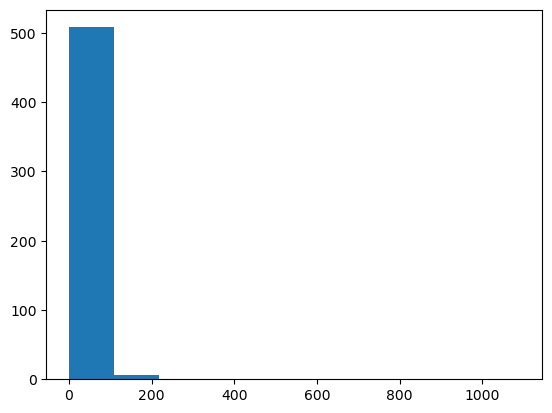

In [66]:
plt.hist((dataframe.area))

array([[<AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>],
       [<AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>],
       [<AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'rain'}>,
        <AxesSubplot:title={'center':'area'}>]], dtype=object)

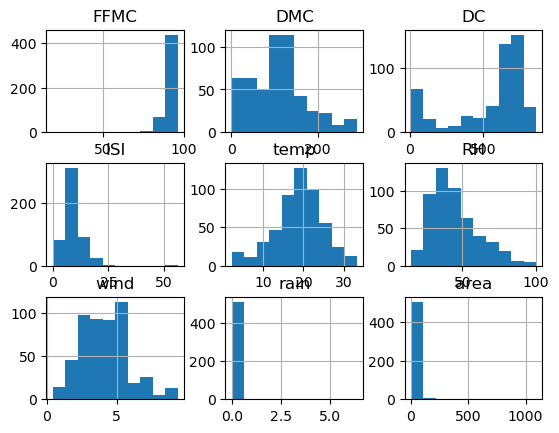

In [67]:
dataframe.hist()


array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

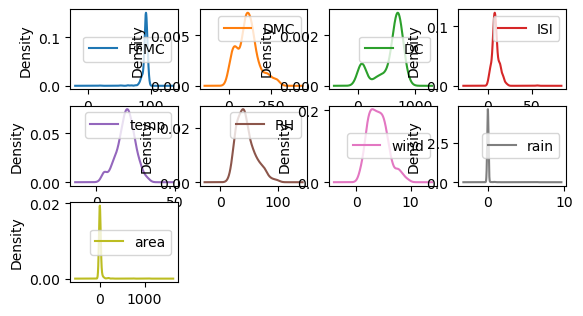

In [68]:
dataframe.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False)

array([[<AxesSubplot:xlabel='FFMC', ylabel='FFMC'>,
        <AxesSubplot:xlabel='DMC', ylabel='FFMC'>,
        <AxesSubplot:xlabel='DC', ylabel='FFMC'>,
        <AxesSubplot:xlabel='ISI', ylabel='FFMC'>,
        <AxesSubplot:xlabel='temp', ylabel='FFMC'>,
        <AxesSubplot:xlabel='RH', ylabel='FFMC'>,
        <AxesSubplot:xlabel='wind', ylabel='FFMC'>,
        <AxesSubplot:xlabel='rain', ylabel='FFMC'>,
        <AxesSubplot:xlabel='area', ylabel='FFMC'>],
       [<AxesSubplot:xlabel='FFMC', ylabel='DMC'>,
        <AxesSubplot:xlabel='DMC', ylabel='DMC'>,
        <AxesSubplot:xlabel='DC', ylabel='DMC'>,
        <AxesSubplot:xlabel='ISI', ylabel='DMC'>,
        <AxesSubplot:xlabel='temp', ylabel='DMC'>,
        <AxesSubplot:xlabel='RH', ylabel='DMC'>,
        <AxesSubplot:xlabel='wind', ylabel='DMC'>,
        <AxesSubplot:xlabel='rain', ylabel='DMC'>,
        <AxesSubplot:xlabel='area', ylabel='DMC'>],
       [<AxesSubplot:xlabel='FFMC', ylabel='DC'>,
        <AxesSubplot:xlabel='DMC'

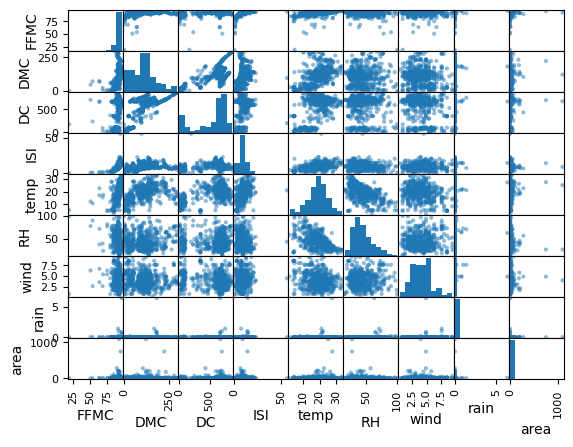

In [69]:
scatter_matrix(dataframe)

In [71]:
dataframe.drop(columns=['month', 'day'], inplace=True)

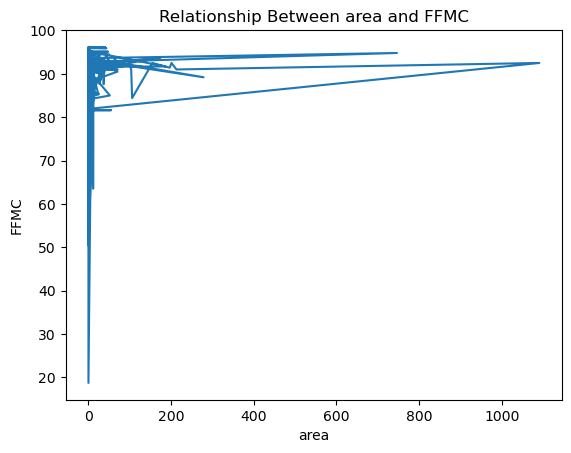

In [72]:
column2 = 'FFMC'
column1 = 'area'


plt.plot(dataframe[column1], dataframe[column2])


plt.xlabel(column1)
plt.ylabel(column2)
plt.title(f'Relationship Between {column1} and {column2}')


plt.show()

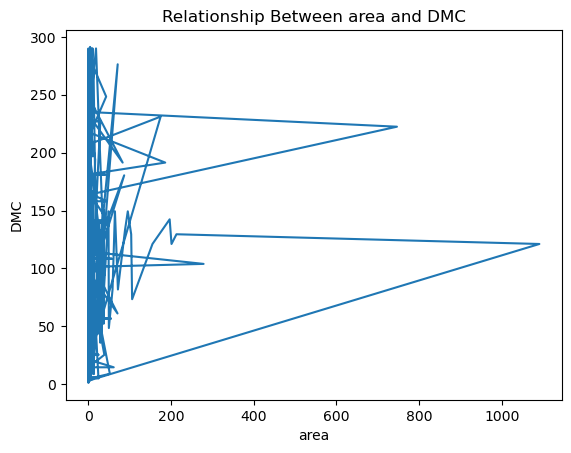

In [73]:
column2 = 'DMC'
column1 = 'area'

plt.plot(dataframe[column1], dataframe[column2])


plt.xlabel(column1)
plt.ylabel(column2)
plt.title(f'Relationship Between {column1} and {column2}')


plt.show()

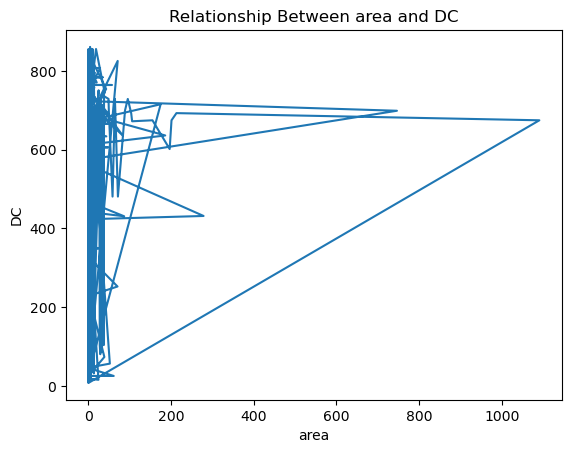

In [74]:
column2 = 'DC'
column1 = 'area'


plt.plot(dataframe[column1], dataframe[column2])


plt.xlabel(column1)
plt.ylabel(column2)
plt.title(f'Relationship Between {column1} and {column2}')

plt.show()

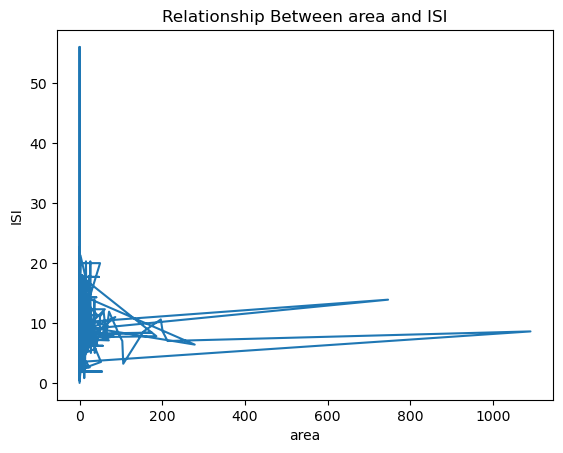

In [75]:
column2 = 'ISI'
column1 = 'area'


plt.plot(dataframe[column1], dataframe[column2])


plt.xlabel(column1)
plt.ylabel(column2)
plt.title(f'Relationship Between {column1} and {column2}')

plt.show()

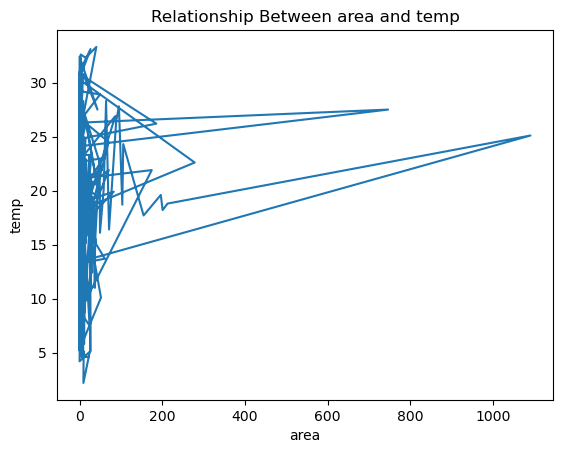

In [76]:
column2 = 'temp'
column1 = 'area'


plt.plot(dataframe[column1], dataframe[column2])


plt.xlabel(column1)
plt.ylabel(column2)
plt.title(f'Relationship Between {column1} and {column2}')


plt.show()

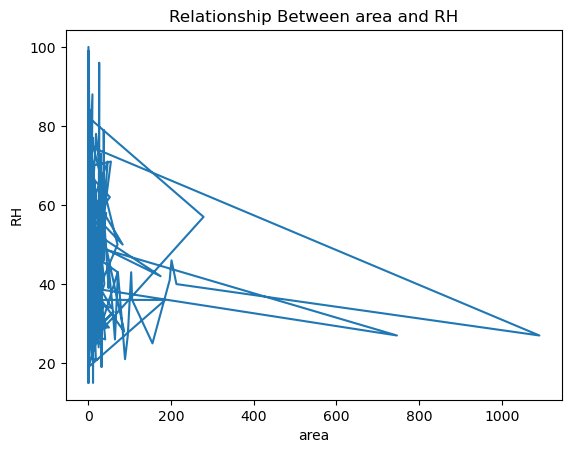

In [46]:
column2 = 'RH'
column1 = 'area'


plt.plot(dataframe[column1], dataframe[column2])


plt.xlabel(column1)
plt.ylabel(column2)
plt.title(f'Relationship Between {column1} and {column2}')


plt.show()

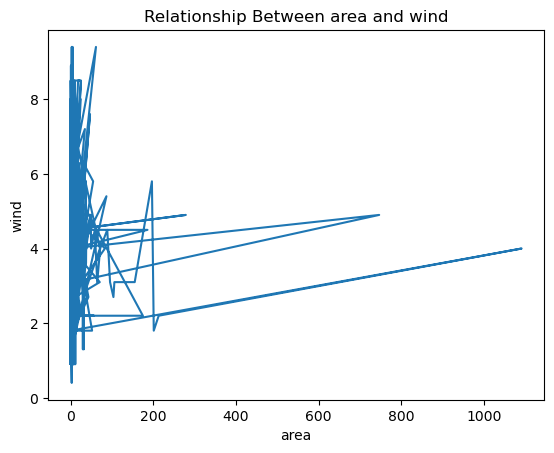

In [47]:
column2 = 'wind'
column1 = 'area'

plt.plot(dataframe[column1], dataframe[column2])

plt.xlabel(column1)
plt.ylabel(column2)
plt.title(f'Relationship Between {column1} and {column2}')


plt.show()

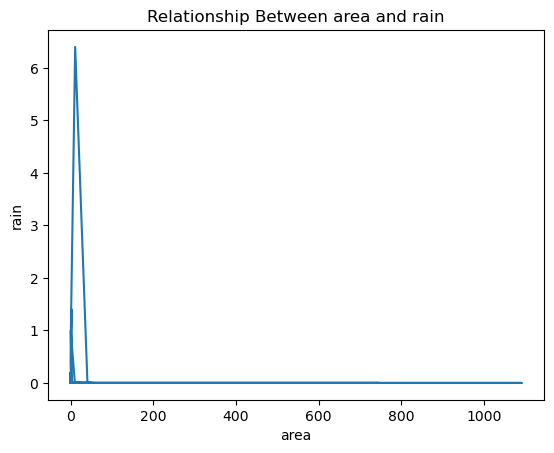

In [48]:
column2 = 'rain'
column1 = 'area'


plt.plot(dataframe[column1], dataframe[column2])

plt.xlabel(column1)
plt.ylabel(column2)
plt.title(f'Relationship Between {column1} and {column2}')

plt.show()

In [49]:
dataset = dataframe.values


X = dataset[:,0:8]
Y = dataset[:,8]

In [50]:

num_instances = len(X)

models = []
models.append(('LiR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('Bag_Re', BaggingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

# Evaluations
results = []
names = []
scoring = []

for name, model in models:
    # Fit the model
    model.fit(X, Y)
    
    predictions = model.predict(X)
    
    # Evaluate the model
    score = explained_variance_score(Y, predictions)
    mae = mean_absolute_error(predictions, Y)
    # print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    results.append(mae)
    names.append(name)
    
    msg = "%s: %f (%f)" % (name, score, mae)
    print(msg)

LiR: 0.016013 (19.287667)
Ridge: 0.016013 (19.286487)
Lasso: 0.015718 (19.186276)
ElasticNet: 0.015731 (19.196385)
Bag_Re: 0.848551 (8.002400)
RandomForest: 0.834888 (7.926625)
ExtraTreesRegressor: 0.997104 (0.627112)
KNN: 0.272130 (15.612375)
CART: 0.997104 (0.627112)
SVM: 0.000504 (12.807656)


In [51]:
Y = numpy.array(Y).reshape((len(Y), 1))
#Y.reshape(-1, 1)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
Y = scaler.fit_transform(Y)

In [52]:
dataframe.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area'], dtype='object')

In [53]:
from sklearn.model_selection import train_test_split


X = dataframe[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']]
y = dataframe['area']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [54]:
dataframe.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area'], dtype='object')

In [60]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import explained_variance_score, mean_absolute_error



models = [
    ('LinearRegression', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('ElasticNet', ElasticNet()),
    ('BaggingRegressor', BaggingRegressor()),
    ('RandomForestRegressor', RandomForestRegressor()),
    ('ExtraTreesRegressor', ExtraTreesRegressor()),
    ('KNeighborsRegressor', KNeighborsRegressor()),
    ('DecisionTreeRegressor', DecisionTreeRegressor()),
    ('SVR', SVR())
]

# Evaluations
results = []
names = []

for name, model in models:
    
    model.fit(X_train, y_train)
    
    
    y_pred = model.predict(X_test)
    

    score = explained_variance_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    

    results.append(mae)
    names.append(name)
    
    
    print(f"{name}: Explained Variance Score = {score}, Mean Absolute Error = {mae}")


LinearRegression: Explained Variance Score = 0.008034543999207111, Mean Absolute Error = 24.198705894711175
Ridge: Explained Variance Score = 0.008030269799565781, Mean Absolute Error = 24.1988346800755
Lasso: Explained Variance Score = 0.006319223444901434, Mean Absolute Error = 24.385119793957788
ElasticNet: Explained Variance Score = 0.006816724466383817, Mean Absolute Error = 24.320672570068584
BaggingRegressor: Explained Variance Score = -0.042625559972665705, Mean Absolute Error = 28.77751602564102
RandomForestRegressor: Explained Variance Score = 0.050993778547183566, Mean Absolute Error = 24.75603046245421
ExtraTreesRegressor: Explained Variance Score = -0.013034687624219776, Mean Absolute Error = 25.21597932692308
KNeighborsRegressor: Explained Variance Score = -0.002700545633111062, Mean Absolute Error = 26.095000000000002
DecisionTreeRegressor: Explained Variance Score = -0.055421761541534886, Mean Absolute Error = 24.35947115384615
SVR: Explained Variance Score = 0.00028341

In [87]:



def predict_area(ffmc, dmc, dc, isi, temp, rh, wind, rain):
    
    input_data = [[ffmc, dmc, dc, isi, temp, rh, wind, rain]]
    
    
    predicted_area = model.predict(input_data)
    
    
    return predicted_area[0]



ffmc_value = float(input("FFMC?: "))
dmc_value = float(input("DMC?: "))
dc_value = float(input("DC?: "))
isi_value = float(input("ISI?: "))
temp_value = float(input("Temp?: "))
rh_value = float(input("RH?: "))
wind_value = float(input("Wind?: "))
rain_value = float(input("Rain?: "))

predicted_area = predict_area(ffmc_value, dmc_value, dc_value, isi_value, temp_value, rh_value, wind_value, rain_value)
print ( predicted_area )
if 1< predicted_area <= 1000:
    print("Small Fires")
    print ("need 5 to 20 people ")
elif 1000 < predicted_area <= 200000:
    print("Medium Fires")
    print ("need 20 to 50 people ")
elif 200000 < predicted_area <= 2000000:
    print("Large Fires")
    print ("need 500 to 1000 people ")
elif predicted_area > 2000000:
    print ("need 1000 to 2000000 people ")
    print("Very Large Fires")
elif predict_area <= 1 :
    print("No possibility of fires")



FFMC?: 1
DMC?: 2
DC?: 0
ISI?: 0
Temp?: 0
RH?: 00
Wind?: 0
Rain?: 0
0.0544254565201745


C:\Users\PC\anaconda3\New folder\New folder\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


TypeError: '<=' not supported between instances of 'function' and 'int'